# Stack Overflow Annual Developer Survey 2023

## Project description
For my data analysis project, I focused on the Stack Overflow Annual Developer Survey for 2023.

The Stack Overflow Annual Developer Survey has delivered industry-leading insights regarding the developer community.

Analysts, IT leaders, reporters, and other developers turn to this report to stay up to date with the evolving developer experience, technologies that are rising or falling in favor, and to understand where tech might be going next.

### Objectives
- Identify the companies where developers get paid the most
- Determine the importance of remote working to employees
- Analyze how coding experience affects the level of pay
- Investigate the most popular method of learning how to code
- Assess whether having a master's degree increases job aspects for developers

In [72]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
cd C:\Users\alexm\Downloads

C:\Users\alexm\Downloads


In [74]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Which companies do developers get paid the most?

In [75]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [76]:
# filter industry and converted salary columns
group1 = df[['Industry','ConvertedCompYearly']]

# group data by industry and mean salaries
avg_salary_by_industry = group1.groupby('Industry')['ConvertedCompYearly']


# Get the highest salary by industry
industry_with_highest_salary = avg_salary_by_industry.mean().idxmax()
highest_avg_salary = avg_salary_by_industry.mean().max()

print(f"The industry with the highest average salary is '{industry_with_highest_salary}' "
      f"with an average salary of ${highest_avg_salary:.2f}")


The industry with the highest average salary is 'Other' with an average salary of $124288.99


## Does remote working matter to employees?

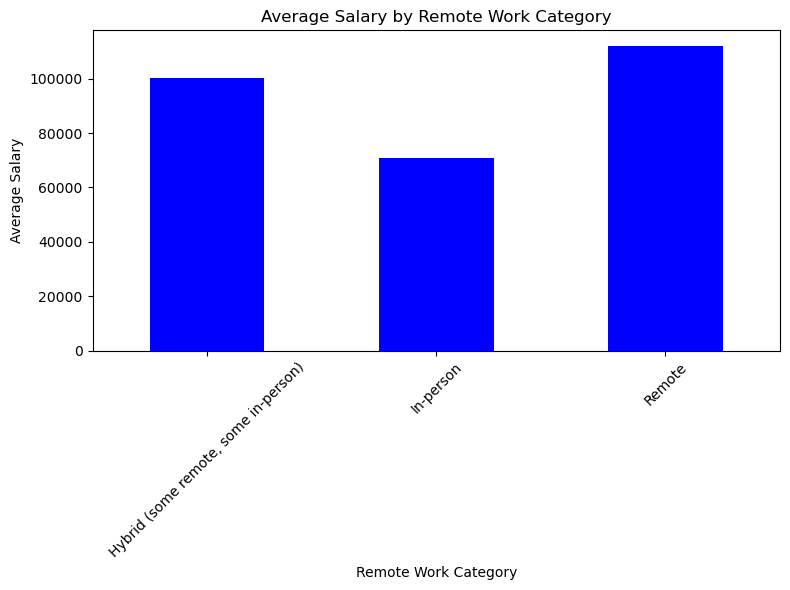

In [77]:
# Explore the distribution of responses in the 'RemoteWork' column
remote_work_distribution = df['RemoteWork'].value_counts()


# Calculate average salary for each remote work category
avg_salary_by_remote = df.groupby('RemoteWork')['ConvertedCompYearly'].mean()

# Create a bar plot to compare average salary by remote work category
plt.figure(figsize=(8, 6))
avg_salary_by_remote.plot(kind='bar', color='blue')
plt.title('Average Salary by Remote Work Category')
plt.xlabel('Remote Work Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations on Average Salary vs. Remote Work:
Remote workers exhibit the highest average salary among different work arrangements. Comparatively, hybrid workers show a closely following average salary, while in-person workers have the lowest average salary.

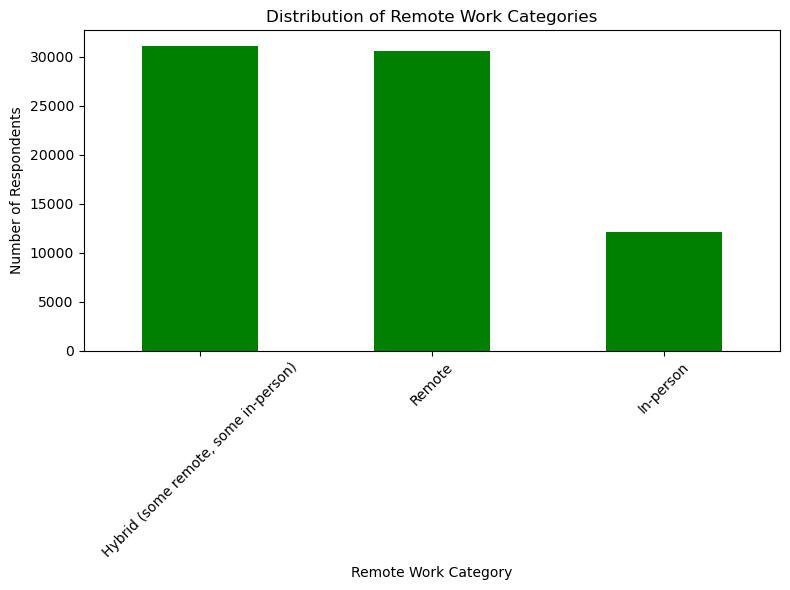

In [78]:
# Bar plot to show the distribution of remote work categories
plt.figure(figsize=(8, 6))
remote_work_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Remote Work Categories')
plt.xlabel('Remote Work Category')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations on Distribution of Remote Work Categories:
The majority of respondents expressed a preference for a hybrid remote work arrangement, indicating a clear preference for flexibility in work settings.

Notably, remote work is a close second in popularity among respondents, reflecting its growing appeal and prominence.

On the other hand, in-person work garnered the least number of respondents, suggesting a potential shift in traditional work preferences.

### Conclusion
Remote working significantly matters to employees, as evidenced by the analysis of the relationship between remote work arrangements and employee preferences. The findings reveal that remote workers enjoy the highest average salary compared to hybrid and in-person workers. This suggests that employees who have the opportunity to work remotely are more likely to receive competitive compensation. Moreover, the majority of respondents expressed a clear preference for hybrid remote work arrangements, indicating that the flexibility to work remotely, even partially, is highly valued. While remote work was the second most preferred option, its popularity is noteworthy, reflecting a growing appeal for a fully remote setup. The traditional in-person work arrangement received the least preference, indicating a potential shift in workplace preferences. Taken together, the analysis demonstrates that remote working is a significant consideration for employees, influencing both compensation and work arrangement preferences

## Does coding experience affect the level of pay?

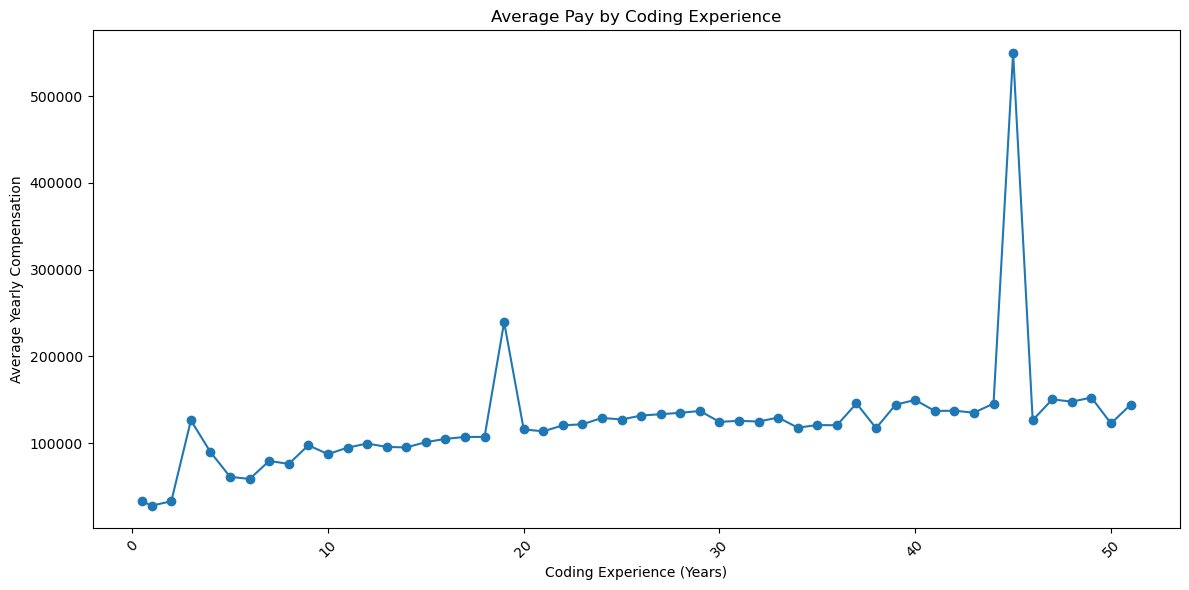

In [79]:
# Convert non-numeric values in YearsCode column to numeric values
df['YearsCode'] = df['YearsCode'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
# Convert the column to numeric type
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

# Group by coding experience (YearsCode) and calculate average pay
avg_pay_by_experience = df.groupby('YearsCode')['ConvertedCompYearly'].mean()

# Plot average pay by coding experience
plt.figure(figsize=(12, 6))
avg_pay_by_experience.plot(kind='line', marker='o')
plt.title('Average Pay by Coding Experience')
plt.xlabel('Coding Experience (Years)')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Analysis of the Relationship Between Coding Experience and Average Yearly Compensation
The analysis reveals that there is a noticeable variation in average yearly compensation based on coding experience:

Employees with relatively lower coding experience, particularly those with less than 5 years of experience, tend to have lower average yearly compensation. This could be attributed to the learning curve and entry-level positions.

As coding experience grows, there's a general trend of increasing average yearly compensation. This is evident from the rise in compensation for employees with 5 to 10 years of experience and the subsequent growth for those with 10 to 20 years of experience.

Interestingly, employees with around 19 years of coding experience exhibit a substantial spike in average yearly compensation. This could be indicative of the value placed on professionals with extensive experience and expertise.

The trend of increasing average compensation continues for employees with 20 to 30 years of experience, demonstrating a positive correlation between experience and pay.

Notably, there are a few instances where coding experience seems to be associated with even higher spikes in average yearly compensation, particularly around the 37 to 41-year range. These outliers might be influenced by specific roles, industries, or skillsets.

The sharp drop in average yearly compensation for those with 45 years of coding experience could be due to fewer respondents in that experience bracket, leading to greater variability in reported salaries.

## What's the most popular method of learning to code?

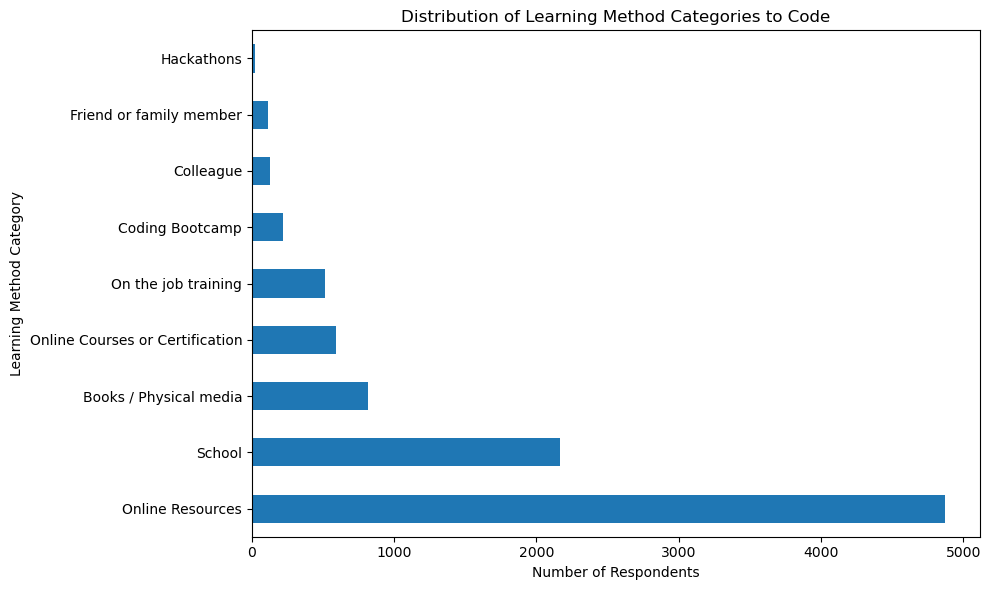

In [82]:
# Create a dictionary to map learning methods to categories
learning_method_categories = {
    'Other online resources (e.g., videos, blogs, forum)': 'Online Resources',
    'Online Courses or Certification': 'Online Courses or Certification',
    'School (i.e., University, College, etc)': 'School',
    'Books / Physical media': 'Books / Physical media',
    'Coding Bootcamp': 'Coding Bootcamp',
    'Friend or family member': 'Friend or family member',
    'On the job training': 'On the job training',
    'Colleague': 'Colleague',
    'Hackathons (virtual or in-person)': 'Hackathons'
}

# Create a new column for learning method categories
df['LearnMethodCategory'] = df['LearnCode'].map(learning_method_categories)

# Count the occurrences of each learning method category
learning_method_category_counts = df['LearnMethodCategory'].value_counts()

# Plot the distribution of learning method categories
plt.figure(figsize=(10, 6))
learning_method_category_counts.plot(kind='barh')  # Horizontal bar plot
plt.title('Distribution of Learning Method Categories to Code')
plt.xlabel('Number of Respondents')
plt.ylabel('Learning Method Category')
plt.tight_layout()
plt.show()


### Conclusion
Based on the analysis, it's evident that Other online resources, Online Courses or Certification, and School are the most popular methods of learning to code among the survey participants.


## Are you most likely to get a job as a developer if you have a master's degree?

In [84]:
df['EdLevel'].unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [85]:
# Filter the dataset to attain EdLevel and Employment columns
group2 = df[['EdLevel','Employment']]

# Count the number of developers with a master's degree who are employed
employed_with_masters = group2.loc[group2['EdLevel']== 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','Employment'].value_counts()

employed_with_masters

Employed, full-time                                                                                                                14816
Independent contractor, freelancer, or self-employed                                                                                1937
Employed, full-time;Independent contractor, freelancer, or self-employed                                                            1179
Employed, part-time                                                                                                                  420
Student, full-time                                                                                                                   407
                                                                                                                                   ...  
Employed, full-time;Employed, part-time;Student, part-time                                                                             1
Not employed, but looking for work;Studen

### Conclusion
According to the analysis,having a master's degree can indeed increase your chances of getting a job as a developer. In the survey, 'Employed, full-time' had the most respondents with a master's degree

## Measuring the significance
The impact of this analysis was significant as it provided valuable insights into the factors affecting developers' salaries, the importance of remote working, the role of coding experience, preffered learning methods and the influence of a master's degree on job prospects. These findings can help inform career decisions, guide learning strategies and provide useful insights for companies in the tech industry.